# Tutorial

Simulate genes under various levels of selection coefficient (from 0 to 800 in 2Ne units for the heterozygous state), with different demographic models (1,2,3-epoch) and with selection time at 15kya from de novo mutation. Each scenario is run 10 times. As an illustration, here only 1 simulation for selection coefficient value is generated (the standard is 125).

In [1]:
# bash generate_data.sh

In [2]:
import os
import gzip

import numpy as np
import scipy.stats

import skimage.transform
from keras import models, layers, optimizers, regularizers
from keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import pymc3 # this will be removed
import pydot

Using TensorFlow backend.


In [4]:
%run -i ImaGene.py

As an illustration, we use the 1-epoch model for the first repetition.

Read simulations and store in object.

In [5]:
myfile = ImaFile(simulations_folder='/home/mfumagal/Data/ImaGene/Simulations1.Epoch1', nr_samples=128, model_name='Marth-3epoch-CEU')

In [6]:
mypop = myfile.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=1)

(optional) Save description of files in .json file

In [ ]:
import json

with open('/home/mfumagal/Data/ImaGene/simulations1.Epoch1.json', 'w') as fp:
    json.dump(mypop.description, fp, sort_keys=True, allow_nan=False, indent=4)

(optional) Save the original data object.

In [17]:
import _pickle as pickle

In [19]:
# to save, create folder
os.mkdir('/home/mfumagal/Data/ImaGene/Images1.Epoch1')

In [ ]:
# save
with open('/home/mfumagal/Data/ImaGene/Images1.Epoch1/mypop','wb') as fp:
    pickle.dump(mypop, fp)

In [ ]:
# to load:
with open('/home/mfumagal/Data/ImaGene/Images1.Epoch1/mypop','rb') as fp:
    mypop = pickle.load(fp)

Explore the object.

In [7]:
mypop.summary()

An object of 800 images
Rows: min 128, max 128, mean 128.000000, std 0.000000
Columns: min 90, max 440, mean 323.502500, std 45.115352


0

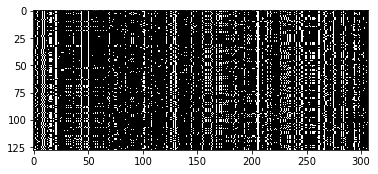

{'name': '/home/mfumagal/Data/ImaGene/Simulations1.Epoch1/msms..257...0150..txt.gz', 'Nref': 10000, 'nr_chroms': 128, 'nr_replicates': 1, 'mutation_rate': 60.0, 'recombination_rate': 40.0, 'recombination_rate_nr_sites': 100000, 'selection_position': 0.5, 'selection_start_time': 0.015, 'selection_start_frequency': 5e-05, 'selection_coeff_HOMO': 514.0, 'selection_coeff_hetero': 257.0, 'selection_coeff_homo': 0.0, 'model': 'Marth-3epoch-CEU', 'modification_stamp': 1547474788.6091316, 'active': 'active'}


In [8]:
mypop.plot(0)
print(mypop.description[0])

Switch to major/minor allele polarisation.

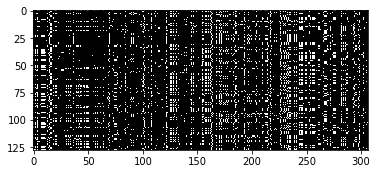

0

In [9]:
mypop.majorminor()
mypop.plot(0)

Filter out rare variants.

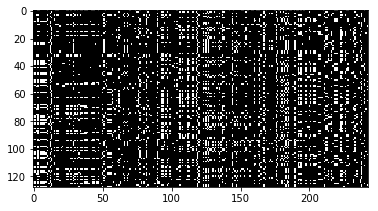

(128, 243, 1)

In [10]:
mypop.filter_freq(0.01)
mypop.plot(0)
mypop.data[0].shape

In [11]:
mypop.summary()

An object of 800 images
Rows: min 128, max 128, mean 128.000000, std 0.000000
Columns: min 45, max 387, mean 262.381250, std 42.708441


0

In [ ]:
# optional
with open('/home/mfumagal/Data/ImaGene/Images1.Epoch1/mypop_majorminor_filtered','wb') as fp:
    pickle.dump(mypop, fp)

Sort images using different orderings.
Then resize to same dimensions 128x128.
Then convert them to float numpy arrays and shuffle using the same order.

In [12]:
shuffle_index = np.random.permutation(len(mypop.data))

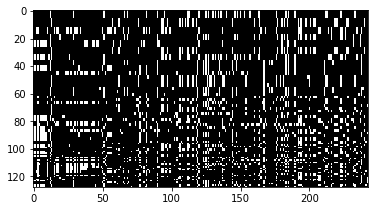

0

In [13]:
# sort by rows
mypop.sort('rows_freq')
mypop.plot(0)

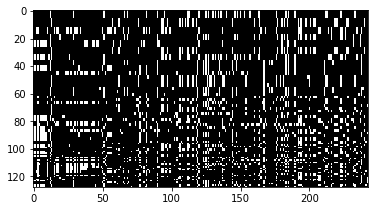

0

In [14]:
# sort by cols too
mypop.sort('rows_freq')
mypop.plot(0)

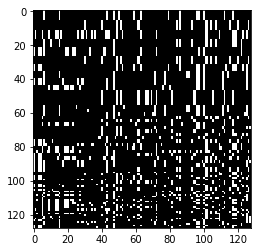

0

In [15]:
# resize
mypop.resize((128, 128))
mypop.plot(0)

Converting to numpy array.
Converting to float32.
Converting to [0,1].
Flipping values.
A numpy array with dimensions (800, 128, 128, 1) and target with length 800 and 800 classes.


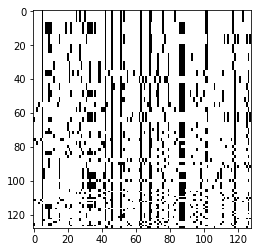

0

In [16]:
# once happy with data processing, convert image into float array and shuffle it
mypop.convert()
mypop.shuffle(shuffle_index)
mypop.plot(0)

In [20]:
# save
with open('/home/mfumagal/Data/ImaGene/Images1.Epoch1/mypop_sortedrowsfreq','wb') as fp:
    pickle.dump(mypop, fp, protocol=4)

In [ ]:
mypop.classes

In [ ]:
mypop.dimensions[0][0]

In [ ]:
mynet = ImaNet(mypop.data)